# Read in the data

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

star_wars = pd.read_csv("datasets/star_wars.csv", encoding = "ISO-8859-1")
star_wars.columns

Index([u'RespondentID',
       u'Have you seen any of the 6 films in the Star Wars franchise?',
       u'Do you consider yourself to be a fan of the Star Wars film franchise?',
       u'Which of the following Star Wars films have you seen? Please select all that apply.',
       u'Unnamed: 4', u'Unnamed: 5', u'Unnamed: 6', u'Unnamed: 7',
       u'Unnamed: 8',
       u'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14',
       u'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19',
       u'Unnamed: 20', u'Unnamed: 21', u'Unnamed: 22', u'Unnamed: 23',
       u'Unnamed: 24', u'Unnamed: 25', u'Unnamed: 26', u'Unnamed: 27',
       u'Unnamed: 28', u'Which character shot first?',
  

# Remove rows with null or NaN Respondant ID

In [2]:
is_not_null = pd.notnull(star_wars['RespondentID'])
star_wars = star_wars.loc[is_not_null]

# Convert Yes/No responses to booleans

In [3]:
yes_no_mapping = {'Yes': True, 'No': False}

# Map column at location 1 and 2 to Yes/No
star_wars[star_wars.columns[1]] = star_wars[star_wars.columns[1]].map(yes_no_mapping)
star_wars[star_wars.columns[2]] = star_wars[star_wars.columns[2]].map(yes_no_mapping)

# Map Movie seen/not seen column to Booleans

In [4]:
star_wars_maps1 = {"Star Wars: Episode I  The Phantom Menace": True, "NaN": False}
star_wars_maps2 = {"Star Wars: Episode II  Attack of the Clones": True, "NaN": False}
star_wars_maps3 = {"Star Wars: Episode III  Revenge of the Sith": True, "NaN": False}
star_wars_maps4 = {"Star Wars: Episode IV  A New Hope": True, "NaN": False}
star_wars_maps5 = {"Star Wars: Episode V The Empire Strikes Back": True}
star_wars_maps6 = {"Star Wars: Episode VI Return of the Jedi": True, "NaN" : False}

star_wars[star_wars.columns[3]] = star_wars[star_wars.columns[3]].map(star_wars_maps1)
star_wars[star_wars.columns[4]] = star_wars[star_wars.columns[4]].map(star_wars_maps2)
star_wars[star_wars.columns[5]] = star_wars[star_wars.columns[5]].map(star_wars_maps3)
star_wars[star_wars.columns[6]] = star_wars[star_wars.columns[6]].map(star_wars_maps4)
star_wars[star_wars.columns[7]] = star_wars[star_wars.columns[7]].map(star_wars_maps5)
star_wars[star_wars.columns[8]] = star_wars[star_wars.columns[8]].map(star_wars_maps6)

# Rename column names for movie seen/not seen columns

In [5]:
movie_col_names_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6",}

star_wars.rename(columns = movie_col_names_map, inplace = True)

# Clean ranking columns

In [6]:
# Change type to integers
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
rank_col_names_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6",}
star_wars.rename(columns = rank_col_names_map, inplace = True)

# Determine highest rated movie

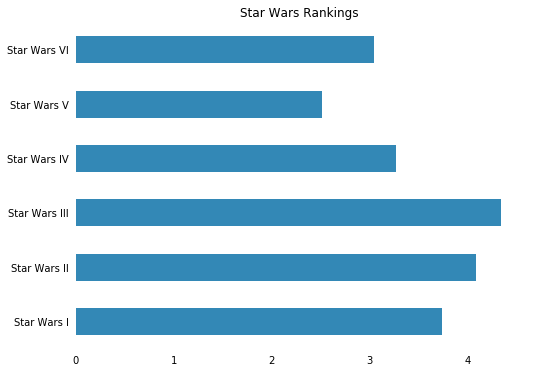

In [7]:
ranking_means = star_wars[star_wars.columns[9:15]].apply(np.mean)

cb_blue = (0/255.0, 107/255.0, 164/255.0)
cb_orange = (255/255.0, 128/255.0, 14/255.0)

fig, ax = plt.subplots(figsize = (8,6))
ranking_means.plot.barh(ax = ax, color = cb_blue, alpha = 0.8)

for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
ax.set_yticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
ax.set_title('Star Wars Rankings')

plt.show()

### Since Star Wars V has lowest rank, this is the most popular movie amoung star wars series and Star Wars III is the least popular movie.

# Finding the most viewed movie

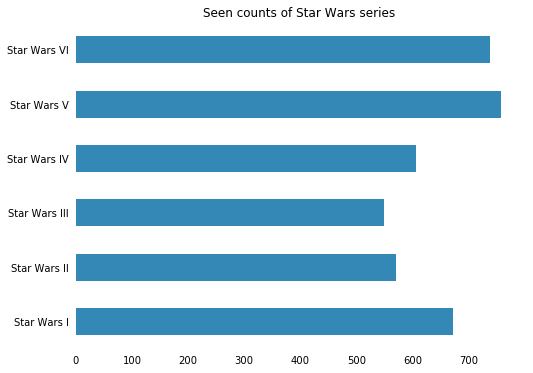

In [8]:
seen_counts = star_wars[star_wars.columns[3:9]].sum()

fig, ax = plt.subplots(figsize = (8,6))
seen_counts.plot.barh(ax = ax, color = cb_blue, alpha = 0.8)

for key, val in ax.spines.items():
    ax.spines[key].set_visible(False)

ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
ax.set_yticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
ax.set_title('Seen counts of Star Wars series')

plt.show()

### Star Wars V is most viewed movie in the series (which is also the most rated movie). Star Wars III is least seen movie, which is also the least popular movie in the series. 
### Hence the viewership is correlated with rating of the movie

# Exploring data for Male/Female segments

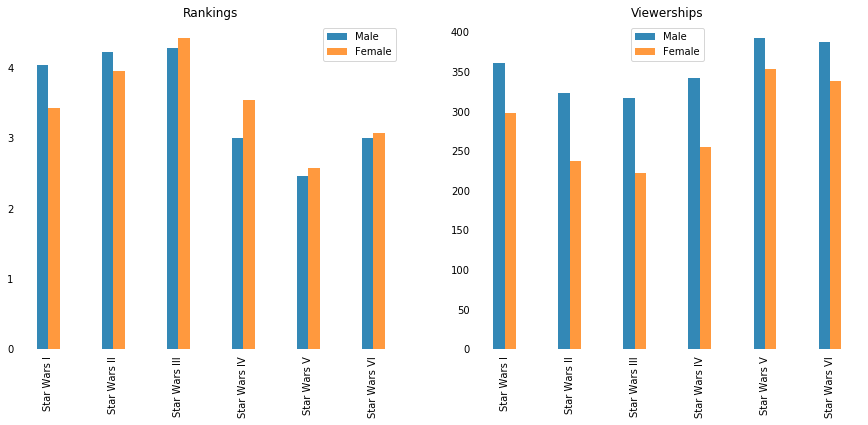

In [9]:
# Determine highest rated movie and most viewed movie among the series for males and females separately
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Create DataFrame from rankings
ranking_means_males = males[males.columns[9:15]].apply(np.mean)
ranking_means_females = females[females.columns[9:15]].apply(np.mean)
ranking_males_females = pd.DataFrame(data = {'Male': ranking_means_males, 'Female': ranking_means_females})

# Create DataFrame from viewerships
seen_means_males = males[males.columns[3:9]].apply(np.sum)
seen_means_females = females[females.columns[3:9]].apply(np.sum)
seen_males_females = pd.DataFrame(data = {'Male': seen_means_males, 'Female': seen_means_females})

bar_width = 0.35
colors = [cb_blue, cb_orange]
cols = ['Male','Female']

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    
    if i == 0:
        ranking_males_females[cols].plot.bar(ax = ax, width = bar_width, color = colors, alpha = 0.8)
        ax.set_title('Rankings')
    else:
        seen_males_females[cols].plot.bar(ax = ax, width = bar_width, color = colors, alpha = 0.8)
        ax.set_title('Viewerships')

    # Remove spines
    for key, val in ax.spines.items():
        ax.spines[key].set_visible(False)
        
    ax.tick_params(bottom = 'off', right = 'off', top = 'off', left = 'off')
    ax.set_xticklabels(['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI'])
     
plt.legend(loc='upper center') # This will change legend of the second plot only, which is desired
plt.show()

### From the plot above we observe that Star Wars I and II are more popular among females and Star Wars III, IV, V and VI are more popular among males
### From viewrships, we observe that overall males watch Star Wars series more than females